# Identificar fronteras no lineales

In [1]:
from sklearn.datasets import make_circles, make_blobs
X,Y = make_circles( 100, factor=0.1, noise=0.1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

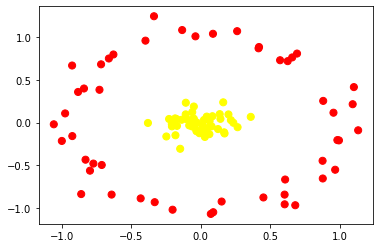

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

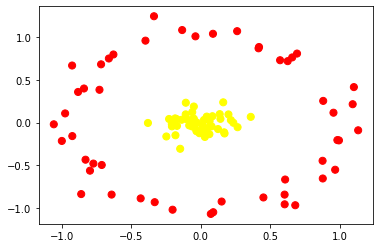

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

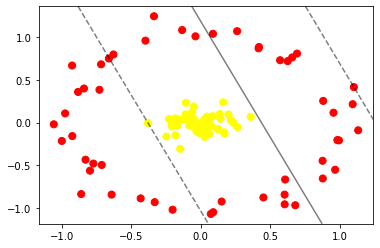

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

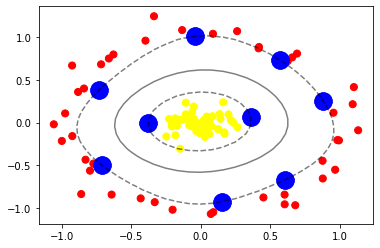

In [6]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

In [7]:
from mpl_toolkits import mplot3d

In [8]:
r = np.exp(-(X**2).sum(1))

In [9]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax= plt.subplot(projection= "3d")
    ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    

In [10]:
from ipywidgets import interact, fixed

In [11]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 8.82557249e-01,  2.53416157e-01],
       [ 1.72459446e-01, -1.28370700e-01],
       [ 9.56591456e-01,  1.14922230e-01],
       [ 1.25451575e-01, -7.66554517e-02],
       [-3.01877336e-02, -8.92054253e-02],
       [-3.69807454e-02,  1.00998676e+00],
       [-7.11474119e-01, -4.97631592e-01],
       [-7.27823863e-01,  3.83523288e-01],
       [-8.59397767e-01, -8.38485165e-01],
       [ 4.43313912e-02,  6.92983273e-02],
       [-3.30237058e-01, -9.33410350e-01],
       [ 2.63072985e-01,  1.07060514e+00],
       [-1.32671111e-01,  1.08355402e+00],
       [ 8.53263827e-02,  7.38060941e-02],
       [-9.85466928e-02,  3.63757324e-02],
       [ 6.83136999e-02, -4.34289355e-02],
       [-6.10409153e-02, -4.62131898e-02],
       [-8.81850828e-01,  3.58139786e-01],
       [ 8.79589277e-01, -6.55883222e-01],
       [ 6.08639592e-01, -6.67987253e-01],
       [ 5.72280454e-01,  7.30021297e-01],
       [-1.82975750e-01,  4.84421289e-02],
       


## Ajustar los parametros de SVM

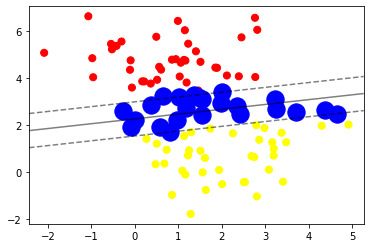

In [13]:
X, Y= make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
model= SVC(kernel="linear", C=10)
model.fit(X, Y)
plt_svc(model)

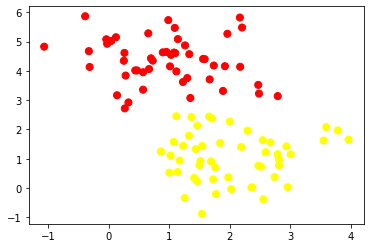

In [14]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

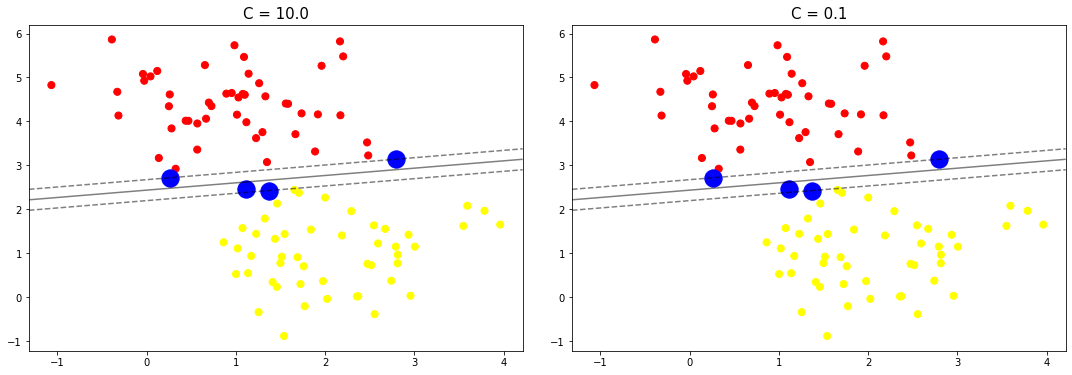

In [15]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    mmodel= SVC(kernel='linear', C=C)
    model.fit(X, Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)